## Predicting the cost of the food served by the restaurants across different cities in India.

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Loading the dataset
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Data_Test.xlsx")
#df=pd.concat([df_train,df_test])
df=df_train


In [80]:
#Seeing the first five rows of dataset
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [81]:
#Checking the shape 
print('Train Data:',df_train.shape)
print('\n')
print('Test Data:',df_test.shape)

Train Data: (12690, 9)


Test Data: (4231, 8)


In [82]:
#Checking the columns of dataset
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [83]:
#Checking the datatypes of the columns
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [84]:
#Finding unique values of columns
for i in df.columns:
    print("Unique values in", i, df[i].nunique())

Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


In [85]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
DESSERT PARLOR,KIOSK           1
QUICK BITES,FOOD TRUCK         1
BAKERY,CONFECTIONERY           1
SWEET SHOP,CONFECTIONERY       1
MICROBREWERY,LOUNGE            1
Name: TITLE, Length: 113, dtype: int64

South Indian                                532
North Indian                                526
North Indian, Chinese                       501
Fast Food                                   286
Chinese                                     167
                                           ... 
Seafood, Chinese, South Indian                1
Continental, Seafood, Fast Food, Italian      1
Mughlai, Biryani, Chinese, North Indian       1
Seafood, Arabian                              1
Bar Food, Modern Indian                       1
Name: CUISINES, Length: 4155, dtype: int64

11am – 11pm (Mon-Sun)    

In [86]:
#Check for Null Values
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

##### Observation:
     
    Having Null values in CITY, LOCALITY, RATING and VOTES .

In [87]:
#Checking rows where Votes are null
df.loc[df['VOTES'].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800
...,...,...,...,...,...,...,...,...,...
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,NaN,1200
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,NaN,300
12646,QUICK BITES,6050,"Kerala, Chinese",11am – 11pm (Mon-Sun),Ernakulam,Market Road,-,NaN,300
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400


##### Observation:

      Here we observe that if Rating of restaurant is new then there are no votes.So we can impute Votes by 0
      as its logical to have no votes for new restaurants.

In [88]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [89]:
#Imputing missing values in VOTES column
df["VOTES"].fillna(0.0,inplace = True)


##### Observation:
     
    a.In Rating column,we see that there are two unique values i.e. 'New' and '-'.
    b.So we will replace it by 0 and null values also to make the Rating column numeric.

In [91]:
#Imputing values in RATING column and converting it into float datatype
df["RATING"].replace("NEW",0,inplace=True)
df["RATING"].replace("-",0,inplace=True)
df["RATING"].fillna(0,inplace=True)
df['RATING'] = df['RATING'].astype(float)

In [93]:
#After observation ,we see that in most of the rows where city is NaN Locality is also NaN.
#So we have to impute both the columns with 'Missing'.
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)

In [94]:
#Check null values again
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

##### Observation:
     
     Now there is no null values present in the dataset .

### Data Visualisation

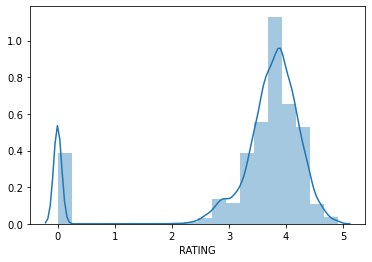

In [95]:
sns.distplot(df['RATING'],bins=20)

Observation:
    
    1.Here we see that maximum rating is from range 3 to 4.5 . 
    
    2.And some Ratings are 0 , which means that these are new restaurants.

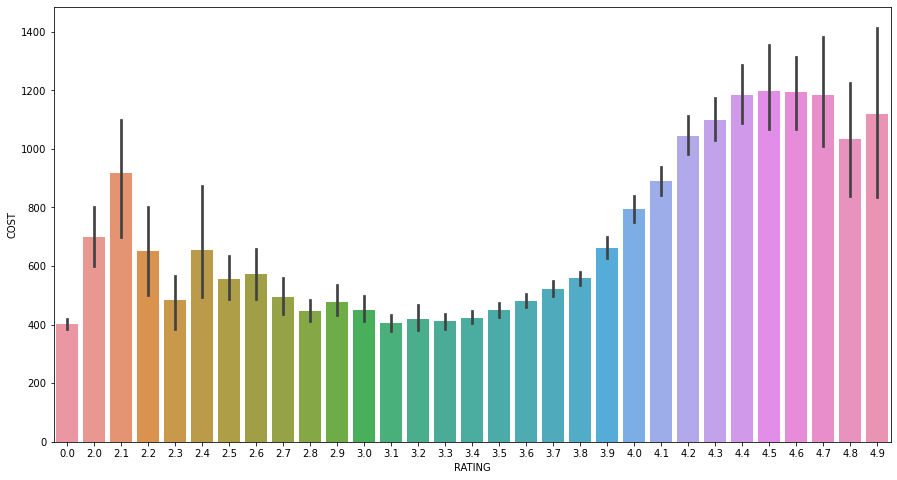

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(x="RATING",y="COST",data=df)
plt.title('RATING vs COST')
plt.show()

##### Observation:
    We observed that as Restaurants Rating increases from 4.0 Food Cost also increases .

In [97]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 892.4+ KB


### Handling Categorical Data

In [98]:
#Dropping 'Restaurant ID' and 'Time' column as it of no use in predicting food cost.
df.drop(columns=['RESTAURANT_ID','TIME'],inplace=True)

In [99]:
#Splitting column values from "," in title column
title=[]
for row in df['TITLE']:
    title.append(list(row.split(',')))
df['TITLE']=title
title_data=df['TITLE'].apply(lambda x: pd.Series(1, x))

In [101]:
#Splitting column values from "," in cuisines column
cuisines=[]
for row in df['CUISINES']:
    cuisines.append(list(row.split(',')))

df['CUISINES']=cuisines
cuisines_data=df['CUISINES'].apply(lambda x: pd.Series(1, x))

In [103]:
#Label Encoding in City column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CITY']=le.fit_transform(df['CITY'])
df['CITY'].head()

0    321
1     67
2     67
3    223
4    223
Name: CITY, dtype: int32

In [104]:
#Combinning variable datasets into a dataframe
df = pd.concat([df,cuisines_data,title_data], axis=1)

In [105]:
#We can drop "CUISINE" and "TITLE"columns
df.drop(columns=["CUISINES","TITLE","LOCALITY"],inplace=True)

In [107]:
df.fillna(0,inplace=True)

## Regression Modelling

In [109]:
#Seprate the input and output variable
df_x=df.drop(columns=["COST"])
y=df[["COST"]]


In [110]:
#Bringing every column to common scale using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(df_x)
df_x=pd.DataFrame(x,columns=df_x.columns)

In [111]:
#Importing all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [112]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=45)


In [114]:
#All Algorithms by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n') 
    

Score of LinearRegression() is: 0.7162984282340351
MAE: 69063946627639.44
MSE: 3.2315200708947627e+30
RMSE: 1797642920853516.8
R2 score: -8.385919423460187e+24
****************************************************************************************************


Score of SVR() is: 0.04984238183462919
MAE: 317.8022332607242
MSE: 366102.6501413877
RMSE: 605.0641702674087
R2 score: 0.04994947967293828
****************************************************************************************************


Score of DecisionTreeRegressor() is: 0.9976341228612896
MAE: 245.9657270975238
MSE: 181848.4649776164
RMSE: 426.43694138479185
R2 score: 0.5280962082466747
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.7245544301906365
MAE: 222.80732860520095
MSE: 154715.5685579196
RMSE: 393.3389995384638
R2 score: 0.5985071226488456
**********************************************************************************

##### Observation:
    Based on RMSE and accuracy score Random Forest Regressor is performing best.
    Final model accuracy is 0.96
    R2 score is 0.7

In [117]:
#Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[10,100,200] ,'max_depth':[5,10,15,20]}
rfr=RandomForestRegressor()

clf=GridSearchCV(rfr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [119]:
#Using Random Forest Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=10)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 score:',r2_score(y_test,y_pred))
print('\n')

Score: 0.9578181371969886


Mean absolute error: 192.34376920702886
Mean squared error: 115375.09853813195
Root Mean Squared Error: 339.66910153579164


R2 score: 0.7005971621439877




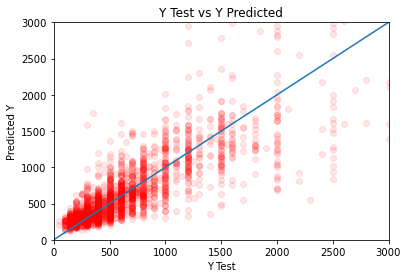

In [142]:
#Plotting our prediction vs test results with RFR model 
plt.scatter(x=y_test,y=y_pred,marker= "o",color="red",alpha=0.1)
plt.xlim(0,3000)
plt.ylim(0,3000)
plt.title('Y Test vs Y Predicted')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
a=sns.lineplot(x=[0,6000],y=[0,6000])
plt.show()

# Overall Remarks:

a. Taken output variable as Cost  
b. Understood relationship of Cost by using datavisualization  
c. Ratings,Votes has linear positive relationship.  
d. Label Encoded object datas such as City for better EDA analysis.  
e. Split column Cuisines and Title to get all variable values  
f. Checked various regressor models and found RandomForest with best r2score  
g. Performed hypertuning to find best parameters of these models and finally chose RF for final model.  
h. Final score for RFR model is 0.96 , R2 score is 0.7  
i. Plotted scatter plot and found linear line that shows close match between test and predicted values.  


### Saving the model

In [147]:
#From above we see RandomForestRegressor is performing better so we will use it to make our final predictions.
Cost_pred=rf.predict(df_test)

In [144]:
#Dataframe for Food Cost prediction
Cost_pred=pd.DataFrame(Cost_pred,columns=["Fees"])

In [145]:
Cost_pred.to_csv('Food_Cost_Predictions.csv',index=False)